# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Dataset Preprocessing 

In [2]:
#To download the dataset 
data = pd.read_csv('C:/Users/adebu/OneDrive/Desktop/diabetic_data.csv')

In [3]:
# Showing the first few rows of the dataset
data.head(100)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1195056,79549353,Caucasian,Male,[70-80),?,2,1,2,1,...,No,Steady,No,No,No,No,No,No,Yes,>30
96,1195548,106343838,Caucasian,Female,[70-80),?,1,3,7,5,...,No,Steady,No,No,No,No,No,No,Yes,>30
97,1212006,84981816,Caucasian,Male,[70-80),?,1,1,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,NO
98,1257282,84488562,Other,Female,[50-60),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
print(data.shape)

(101766, 50)


# Removing Uneccessary columns

In [5]:
# List of columns to be dropped (replace 'column_name' with the actual column names)
columns_to_drop = ['patient_nbr', 'encounter_id', 'weight', 'payer_code', 'medical_specialty', 'examide', 'citoglipton']
# Drop the specified columns
data_new = data.drop(columns=columns_to_drop)    

# Removing and Replacing Null Values

In [6]:
# Replace '?' with NaN
data_new.replace('?', pd.NA, inplace=True)

In [7]:
# To get the number of Null values for different columns
data_new.isna().sum()

race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone 

In [8]:
# Drop rows with missing values in 'diag_1', 'diag_2', and 'diag_3' columns
data_new.dropna(subset=['diag_1', 'diag_2', 'diag_3'], inplace=True)

# Display the updated DataFrame
data_new.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [9]:
# Define a function to replace missing values with random race values
def fillna_with_random(data, column):
    non_null_values = data[column].dropna().values
    num_missing = data[column].isna().sum()
    random_choices = np.random.choice(non_null_values, num_missing)
    data.loc[data[column].isna(), column] = random_choices
    
    # Replace missing values in 'race' column with random race values
fillna_with_random(data_new, 'race')

# Display the updated DataFrame
data_new.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [10]:
# Replace NaN values in 'max_glu_serum' and 'A1Cresult' with 'None'
data_new['max_glu_serum'].fillna('None', inplace=True)
data_new['A1Cresult'].fillna('None', inplace=True)

# Display the unique values after replacement to verify
print("Unique values for max_glu_serum after replacement:", data_new['max_glu_serum'].unique())
print("Unique values for A1Cresult after replacement:", data_new['A1Cresult'].unique())

Unique values for max_glu_serum after replacement: ['None' '>300' 'Norm' '>200']
Unique values for A1Cresult after replacement: ['None' '>7' '>8' 'Norm']


In [11]:
# To get the number of Null values for different columns
data_new.isna().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [12]:
print(data_new.shape)

(100244, 43)


# Feature Engineering

# Regrouping ICD_9 Codes to Few Disease Categories

In [13]:
# Define a function to map ICD-9 codes to disease categories
def map_icd9_to_category(icd9_code):
    if pd.isna(icd9_code):
        return 'Missing'  # Return a category for missing values
    else:
        # Extract the first three characters of the code
        code_prefix = icd9_code.split('.')[0]
        
        # Define a mapping dictionary for the ranges of ICD-9 codes to disease categories
        icd9_mapping = {
            '001-139': 'Infectious And Parasitic Diseases',
            '140-239': 'Neoplasms',
            '240-279': 'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders',
            '280-289': 'Diseases Of The Blood And Blood-Forming Organs',
            '290-319': 'Mental Disorders',
            '320-389': 'Diseases Of The Nervous System And Sense Organs',
            '390-459': 'Diseases Of The Circulatory System',
            '460-519': 'Diseases Of The Respiratory System',
            '520-579': 'Diseases Of The Digestive System',
            '580-629': 'Diseases Of The Genitourinary System',
            '630-679': 'Complications Of Pregnancy, Childbirth, And The Puerperium',
            '680-709': 'Diseases Of The Skin And Subcutaneous Tissue',
            '710-739': 'Diseases Of The Musculoskeletal System And Connective Tissue',
            '740-759': 'Congenital Anomalies',
            '760-779': 'Certain Conditions Originating In The Perinatal Period',
            '780-799': 'Symptoms, Signs, And Ill-Defined Conditions',
            '800-999': 'Injury And Poisoning',
            'V01-V91': 'Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services',
            'E000-E999': 'Supplementary Classification Of External Causes Of Injury And Poisoning'
        }

        # Iterate over the mapping dictionary and return the category if the code is within the range
        for range_, category in icd9_mapping.items():
            start, end = range_.split('-')
            if start <= code_prefix <= end:
                return category
        
        # Return 'Other' if the code doesn't match any range
        return 'Other'

# Apply the mapping function to 'diag_1', 'diag_2', and 'diag_3' columns
for col in ['diag_1', 'diag_2', 'diag_3']:
    data_new[col] = data_new[col].apply(map_icd9_to_category)

# Display the updated DataFrame
data_new.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [14]:
# List of medicine columns
medicine_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
                    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
                    'insulin', 'glyburide-metformin', 'glipizide-metformin',
                    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

# Relabel medicine columns based on conditions
for col in medicine_columns:
    data_new[col] = data_new[col].apply(lambda x: 'Yes' if x in ['Up', 'Down'] else 'No' if x in ['Steady', 'None'] else x)

# Count 'Yes' occurrences in medicine columns and create 'Count_Meds' column
data_new['diabetes_Meds_count'] = data_new[medicine_columns].apply(lambda row: row.isin(['Yes']).sum(), axis=1)

# Drop the initial medicine columns
data_new.drop(columns=medicine_columns, inplace=True)

# Showing the first few rows of the dataset
data_new.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,diabetes_Meds_count
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,"Endocrine, Nutritional And Metabolic Diseases,...","Endocrine, Nutritional And Metabolic Diseases,...","Endocrine, Nutritional And Metabolic Diseases,...",9,None,None,Ch,Yes,>30,1
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,"Complications Of Pregnancy, Childbirth, And Th...","Endocrine, Nutritional And Metabolic Diseases,...",Supplementary Classification Of Factors Influe...,6,None,None,No,Yes,NO,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,Other,"Endocrine, Nutritional And Metabolic Diseases,...",Diseases Of The Circulatory System,7,None,None,Ch,Yes,NO,1
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,Neoplasms,Neoplasms,"Endocrine, Nutritional And Metabolic Diseases,...",5,None,None,Ch,Yes,NO,0
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,Diseases Of The Circulatory System,Diseases Of The Circulatory System,"Endocrine, Nutritional And Metabolic Diseases,...",9,None,None,No,Yes,>30,0


In [15]:
# Create a new column 'all_med_count' that is the sum of 'num_medications' and 'diabetic_Meds'
data_new['all_med_count'] = data_new['num_medications'] + data_new['diabetes_Meds_count']

# Drop the 'num_medications' column
data_new.drop(columns=['num_medications'], inplace=True)

# Showing the first few rows of the dataset
data_new.head()


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,number_outpatient,...,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,diabetes_Meds_count,all_med_count
1,Caucasian,Female,[10-20),1,1,7,3,59,0,0,...,"Endocrine, Nutritional And Metabolic Diseases,...","Endocrine, Nutritional And Metabolic Diseases,...",9,None,None,Ch,Yes,>30,1,19
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,2,...,"Endocrine, Nutritional And Metabolic Diseases,...",Supplementary Classification Of Factors Influe...,6,None,None,No,Yes,NO,0,13
3,Caucasian,Male,[30-40),1,1,7,2,44,1,0,...,"Endocrine, Nutritional And Metabolic Diseases,...",Diseases Of The Circulatory System,7,None,None,Ch,Yes,NO,1,17
4,Caucasian,Male,[40-50),1,1,7,1,51,0,0,...,Neoplasms,"Endocrine, Nutritional And Metabolic Diseases,...",5,None,None,Ch,Yes,NO,0,8
5,Caucasian,Male,[50-60),2,1,2,3,31,6,0,...,Diseases Of The Circulatory System,"Endocrine, Nutritional And Metabolic Diseases,...",9,None,None,No,Yes,>30,0,16


In [16]:
# Create the new column 'total_num_procedures'
data_new['total_num_procedures'] = data_new['num_lab_procedures'] + data_new['num_procedures']

# Drop the initial 'num_lab_procedures' and 'num_procedures' variables
data_new = data_new.drop(columns=['num_lab_procedures', 'num_procedures'])

# Show the first few rows of the modified dataset
data_new.head()


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_emergency,number_inpatient,...,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,diabetes_Meds_count,all_med_count,total_num_procedures
1,Caucasian,Female,[10-20),1,1,7,3,0,0,0,...,"Endocrine, Nutritional And Metabolic Diseases,...",9,None,None,Ch,Yes,>30,1,19,59
2,AfricanAmerican,Female,[20-30),1,1,7,2,2,0,1,...,Supplementary Classification Of Factors Influe...,6,None,None,No,Yes,NO,0,13,16
3,Caucasian,Male,[30-40),1,1,7,2,0,0,0,...,Diseases Of The Circulatory System,7,None,None,Ch,Yes,NO,1,17,45
4,Caucasian,Male,[40-50),1,1,7,1,0,0,0,...,"Endocrine, Nutritional And Metabolic Diseases,...",5,None,None,Ch,Yes,NO,0,8,51
5,Caucasian,Male,[50-60),2,1,2,3,0,0,0,...,"Endocrine, Nutritional And Metabolic Diseases,...",9,None,None,No,Yes,>30,0,16,37


In [17]:
# Create the new column 'number_visit' by summing the specified columns
data_new['number_visit'] = data_new[['number_outpatient', 'number_emergency', 'number_inpatient']].sum(axis=1)

# Drop the original columns
data_new.drop(columns=['number_outpatient', 'number_emergency', 'number_inpatient'], inplace=True)

# Show the first few rows of the modified dataset
data_new.head()


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,diabetes_Meds_count,all_med_count,total_num_procedures,number_visit
1,Caucasian,Female,[10-20),1,1,7,3,"Endocrine, Nutritional And Metabolic Diseases,...","Endocrine, Nutritional And Metabolic Diseases,...","Endocrine, Nutritional And Metabolic Diseases,...",9,None,None,Ch,Yes,>30,1,19,59,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,"Complications Of Pregnancy, Childbirth, And Th...","Endocrine, Nutritional And Metabolic Diseases,...",Supplementary Classification Of Factors Influe...,6,None,None,No,Yes,NO,0,13,16,3
3,Caucasian,Male,[30-40),1,1,7,2,Other,"Endocrine, Nutritional And Metabolic Diseases,...",Diseases Of The Circulatory System,7,None,None,Ch,Yes,NO,1,17,45,0
4,Caucasian,Male,[40-50),1,1,7,1,Neoplasms,Neoplasms,"Endocrine, Nutritional And Metabolic Diseases,...",5,None,None,Ch,Yes,NO,0,8,51,0
5,Caucasian,Male,[50-60),2,1,2,3,Diseases Of The Circulatory System,Diseases Of The Circulatory System,"Endocrine, Nutritional And Metabolic Diseases,...",9,None,None,No,Yes,>30,0,16,37,0


In [18]:
# Rename the column 'number_diagnoses' to 'num_comorbidity'
data_new.rename(columns={'number_diagnoses': 'num_comorbidity'}, inplace=True)

# Showing the first few rows of the dataset to verify the change
data_new.head()


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,diag_1,diag_2,diag_3,num_comorbidity,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,diabetes_Meds_count,all_med_count,total_num_procedures,number_visit
1,Caucasian,Female,[10-20),1,1,7,3,"Endocrine, Nutritional And Metabolic Diseases,...","Endocrine, Nutritional And Metabolic Diseases,...","Endocrine, Nutritional And Metabolic Diseases,...",9,None,None,Ch,Yes,>30,1,19,59,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,"Complications Of Pregnancy, Childbirth, And Th...","Endocrine, Nutritional And Metabolic Diseases,...",Supplementary Classification Of Factors Influe...,6,None,None,No,Yes,NO,0,13,16,3
3,Caucasian,Male,[30-40),1,1,7,2,Other,"Endocrine, Nutritional And Metabolic Diseases,...",Diseases Of The Circulatory System,7,None,None,Ch,Yes,NO,1,17,45,0
4,Caucasian,Male,[40-50),1,1,7,1,Neoplasms,Neoplasms,"Endocrine, Nutritional And Metabolic Diseases,...",5,None,None,Ch,Yes,NO,0,8,51,0
5,Caucasian,Male,[50-60),2,1,2,3,Diseases Of The Circulatory System,Diseases Of The Circulatory System,"Endocrine, Nutritional And Metabolic Diseases,...",9,None,None,No,Yes,>30,0,16,37,0


In [19]:
# Showing the first few rows of the dataset
data_new.head(100)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,diag_1,diag_2,diag_3,num_comorbidity,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,diabetes_Meds_count,all_med_count,total_num_procedures,number_visit
1,Caucasian,Female,[10-20),1,1,7,3,"Endocrine, Nutritional And Metabolic Diseases,...","Endocrine, Nutritional And Metabolic Diseases,...","Endocrine, Nutritional And Metabolic Diseases,...",9,None,None,Ch,Yes,>30,1,19,59,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,"Complications Of Pregnancy, Childbirth, And Th...","Endocrine, Nutritional And Metabolic Diseases,...",Supplementary Classification Of Factors Influe...,6,None,None,No,Yes,NO,0,13,16,3
3,Caucasian,Male,[30-40),1,1,7,2,Other,"Endocrine, Nutritional And Metabolic Diseases,...",Diseases Of The Circulatory System,7,None,None,Ch,Yes,NO,1,17,45,0
4,Caucasian,Male,[40-50),1,1,7,1,Neoplasms,Neoplasms,"Endocrine, Nutritional And Metabolic Diseases,...",5,None,None,Ch,Yes,NO,0,8,51,0
5,Caucasian,Male,[50-60),2,1,2,3,Diseases Of The Circulatory System,Diseases Of The Circulatory System,"Endocrine, Nutritional And Metabolic Diseases,...",9,None,None,No,Yes,>30,0,16,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Caucasian,Male,[70-80),1,1,7,3,Diseases Of The Circulatory System,Diseases Of The Circulatory System,Diseases Of The Respiratory System,9,None,None,Ch,Yes,NO,1,24,59,1
98,Other,Female,[50-60),1,1,7,2,Diseases Of The Genitourinary System,"Endocrine, Nutritional And Metabolic Diseases,...",Diseases Of The Circulatory System,3,None,>8,Ch,Yes,NO,1,7,53,0
99,Caucasian,Male,[30-40),2,6,4,6,Diseases Of The Digestive System,Diseases Of The Blood And Blood-Forming Organs,"Endocrine, Nutritional And Metabolic Diseases,...",5,None,None,Ch,Yes,>30,0,16,74,1
100,Caucasian,Male,[70-80),1,11,7,9,Diseases Of The Circulatory System,Diseases Of The Respiratory System,"Endocrine, Nutritional And Metabolic Diseases,...",9,None,None,No,Yes,NO,0,30,58,0


# Checking and Removing Duplicates

In [20]:
# Check for duplicate rows
duplicate_rows = data_new[data_new.duplicated()]

# Print duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
    
    # Remove duplicate rows
    data_new = data_new.drop_duplicates()
    print("\nDuplicates have been removed.")
else:
    print("No duplicate rows found.")


No duplicate rows found.


# Encoding Categorical Variables

In [21]:
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
#To initialize LabelEncoder
label_encoder = LabelEncoder()

#To encode each categorical column
categorical_columns = ['race', 'gender', 'age', 'admission_type_id', 'max_glu_serum', 'A1Cresult', 'diag_1', 'diag_2', 'diag_3', 'change', 'diabetesMed']

for column in categorical_columns:
    data_new[column] = label_encoder.fit_transform(data_new[column])

#To display the first few rows of the dataset to verify encoding
data_new.head()


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,diag_1,diag_2,diag_3,num_comorbidity,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,diabetes_Meds_count,all_med_count,total_num_procedures,number_visit
1,2,0,1,0,1,7,3,10,10,10,9,2,2,0,1,>30,1,19,59,0
2,0,0,2,0,1,7,2,0,10,17,6,2,2,1,1,NO,0,13,16,3
3,2,1,3,0,1,7,2,15,10,3,7,2,2,0,1,NO,1,17,45,0
4,2,1,4,0,1,7,1,14,14,10,5,2,2,0,1,NO,0,8,51,0
5,2,1,5,1,1,2,3,3,3,10,9,2,2,1,1,>30,0,16,37,0


# Target Variable: Conversion from Multiple to Binary Classes and then Encoded

In [22]:
# Check unique values in 'readmitted' column
readmitted_values = data_new['readmitted'].unique()

# Display unique values
print("Unique values in 'readmitted' column:")
print(readmitted_values)

Unique values in 'readmitted' column:
['>30' 'NO' '<30']


In [23]:
# Assuming 'data' is your DataFrame and 'readmitted' is the column to be converted
data_new['readmitted'] = data_new['readmitted'].replace({'<30': 0, '>30': 0, 'NO': 1})

In [24]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'readmitted' column
data_new['readmitted'] = label_encoder.fit_transform(data_new['readmitted'])

# Get the mapping of encoded labels to original categories
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Mapping of Encoded Labels to Original Categories:")
for category, encoded_label in label_mapping.items():
    print(f"{category}: {encoded_label}")

Mapping of Encoded Labels to Original Categories:
0: 0
1: 1


#  Detecting and Transforming Outliers and Skewness

admission_type_id: Outliers below lower bound: 0, Outliers above upper bound: 336
discharge_disposition_id: Outliers below lower bound: 0, Outliers above upper bound: 9714
admission_source_id: Outliers below lower bound: 0, Outliers above upper bound: 6858
time_in_hospital: Outliers below lower bound: 0, Outliers above upper bound: 2246
num_comorbidity: Outliers below lower bound: 0, Outliers above upper bound: 62
readmitted: Outliers below lower bound: 0, Outliers above upper bound: 0
diabetes_Meds_count: Outliers below lower bound: 0, Outliers above upper bound: 113
all_med_count: Outliers below lower bound: 0, Outliers above upper bound: 2427
total_num_procedures: Outliers below lower bound: 0, Outliers above upper bound: 291
number_visit: Outliers below lower bound: 0, Outliers above upper bound: 4389


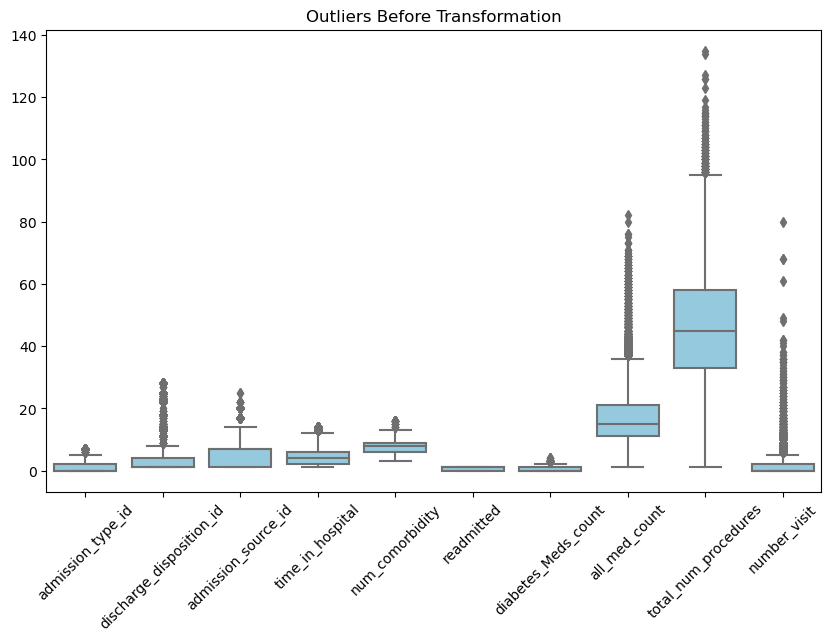

In [25]:
# Define a function to calculate IQR and identify outliers
def iqr_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot box plots for outliers before and after transformation
def plot_outliers(df_before, df_after):
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
    axes = axes.flatten()
    for i, column in enumerate(df_before.columns):
        sns.boxplot(y=df_before[column], ax=axes[i], color='skyblue')
        sns.boxplot(y=df_after[column], ax=axes[i], color='lightgreen')
        axes[i].set_title(column)
        axes[i].set_ylabel('')
        axes[i].set_xlabel('')
    plt.tight_layout()
    plt.show()

# Extract numeric columns from data_new
numeric_cols = data_new.select_dtypes(include=['float64', 'int64'])

# Apply the IQR method to numeric columns and transform outliers
for column in numeric_cols.columns:
    lower_bound, upper_bound = iqr_outliers(numeric_cols[column])
    # Cap outliers
    data_new[column] = numeric_cols[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Function to check for outliers after transformation
def check_outliers(df):
    for column in df.columns:
        lower_bound, upper_bound = iqr_outliers(df[column])
        outliers_below = (df[column] < lower_bound).sum()
        outliers_above = (df[column] > upper_bound).sum()
        print(f"{column}: Outliers below lower bound: {outliers_below}, Outliers above upper bound: {outliers_above}")

# Check if outliers are still present in the numeric columns
check_outliers(numeric_cols)

# Showing the first few rows of the dataset
data_new.head()

# Extract numeric columns from data_new
numeric_cols_before = data_new.select_dtypes(include=['float64', 'int64']).copy()

# Apply the IQR method to numeric columns and transform outliers
for column in numeric_cols_before.columns:
    lower_bound, upper_bound = iqr_outliers(numeric_cols_before[column])
    # Cap outliers
    numeric_cols_before[column] = numeric_cols_before[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Plot outliers before transformation
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_cols, color='skyblue')
plt.title("Outliers Before Transformation")
plt.xticks(rotation=45)
plt.show()


Skewness of numerical features before transformation:
 admission_type_id           1.515271
discharge_disposition_id    1.173338
admission_source_id         0.798028
time_in_hospital            0.984276
num_comorbidity            -0.830428
readmitted                 -0.148003
diabetes_Meds_count         1.352649
all_med_count               0.682204
total_num_procedures       -0.232743
number_visit                1.467347
dtype: float64


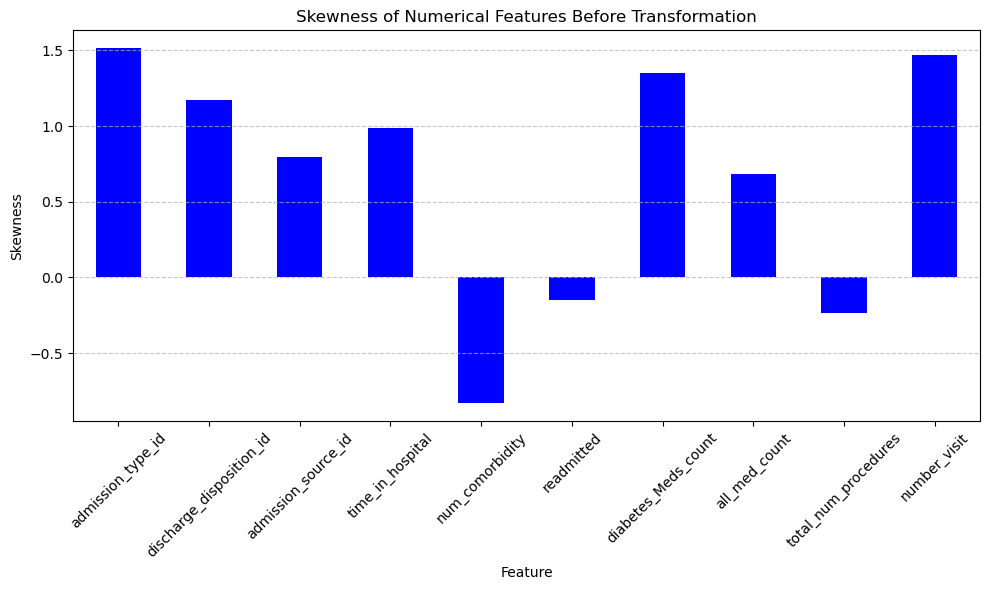

Skewed columns:
 Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_comorbidity', 'diabetes_Meds_count',
       'all_med_count', 'number_visit'],
      dtype='object')
Skewness of transformed features:
 admission_type_id           0.757290
discharge_disposition_id    1.144536
admission_source_id         0.003840
time_in_hospital            0.382572
num_comorbidity            -5.251843
diabetes_Meds_count         1.023349
all_med_count              -0.504760
number_visit                0.804789
dtype: float64
The column admission_type_id is right-skewed with a skewness value of 0.76
The column discharge_disposition_id is right-skewed with a skewness value of 1.14
The column admission_source_id is approximately symmetrical with a skewness value of 0.00
The column time_in_hospital is approximately symmetrical with a skewness value of 0.38
The column num_comorbidity is left-skewed with a skewness value of -5.25
The column diabetes

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

# Assume data_new is your DataFrame
# Load your data
# data_new = pd.read_csv('your_dataset.csv')

# Calculate skewness for each numerical column before transformation
numeric_cols = data_new.select_dtypes(include=['float64', 'int64']).columns
skewness_before = data_new[numeric_cols].apply(skew)
print("Skewness of numerical features before transformation:\n", skewness_before)

# Plot skewness before transformation
plt.figure(figsize=(10, 6))
skewness_before.plot(kind='bar', color='blue')
plt.title('Skewness of Numerical Features Before Transformation')
plt.xlabel('Feature')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Define a threshold for skewness
skew_threshold = 0.5

# Get the numeric columns with skewness greater than the threshold
skewed_cols = skewness_before[abs(skewness_before) > skew_threshold].index
print("Skewed columns:\n", skewed_cols)

# Apply log transformation to skewed columns
for col in skewed_cols:
    # Add a constant to avoid taking log of zero and handle negative values if any
    data_new[col] = np.log1p(data_new[col])
    # Round to the nearest integer to make the numbers discrete
    data_new[col] = np.round(data_new[col])

# Calculate skewness after transformation
skewness_after = data_new[skewed_cols].apply(skew)
print("Skewness of transformed features:\n", skewness_after)

# Interpret skewness after transformation
for col, skew_value in skewness_after.items():
    if skew_value > 0.5:
        skewness_type = 'right-skewed'
    elif skew_value < -0.5:
        skewness_type = 'left-skewed'
    else:
        skewness_type = 'approximately symmetrical'
    print(f'The column {col} is {skewness_type} with a skewness value of {skew_value:.2f}')


In [27]:
# Separate features (X) and target variable (y)
features = data_new.drop(columns=['readmitted'])  # Replace 'target_column_name' with the name of your target column
target = data_new['readmitted']


# Feature Imporatance

Explained Variance Ratio: [0.12304766 0.08507667 0.06944868 0.06366769 0.06046616 0.05743519
 0.05433953 0.05228439 0.05038367 0.04896252 0.04888616 0.04774614
 0.04317851 0.04078245 0.0388473  0.03614771 0.03259935 0.03079564
 0.0159046 ]
Cumulative Explained Variance: [0.12304766 0.20812433 0.27757301 0.3412407  0.40170685 0.45914204
 0.51348157 0.56576596 0.61614963 0.66511215 0.7139983  0.76174444
 0.80492294 0.84570539 0.8845527  0.92070041 0.95329976 0.9840954
 1.        ]


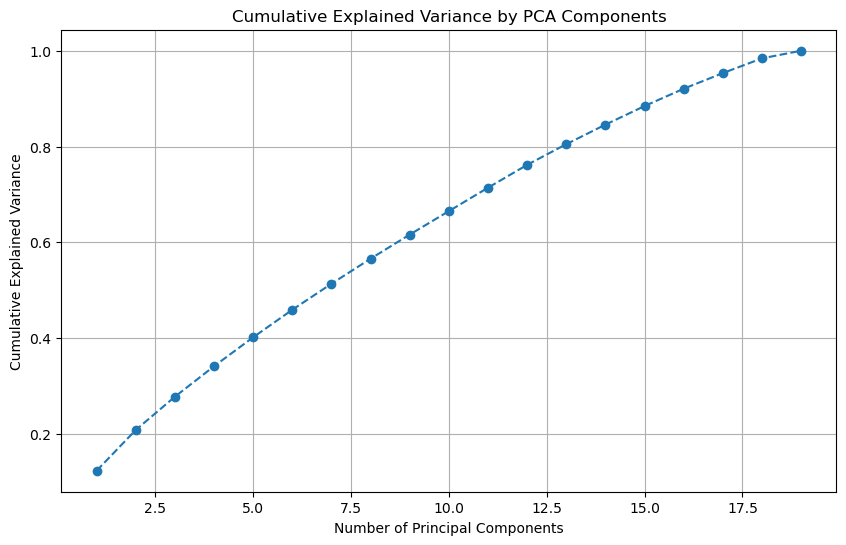

                               PC1       PC2
race                      0.012465 -0.035936
gender                   -0.001974  0.082783
age                       0.003453 -0.378526
admission_type_id         0.001849  0.128733
discharge_disposition_id  0.071871 -0.236175
admission_source_id       0.020740 -0.099384
time_in_hospital          0.280637 -0.375931
diag_1                   -0.035097  0.248777
diag_2                   -0.014724  0.269160
diag_3                   -0.023577  0.234666
num_comorbidity           0.085037 -0.267187
max_glu_serum            -0.064306 -0.028670
A1Cresult                -0.104142 -0.053300
change                   -0.516957 -0.270259
diabetesMed               0.408344  0.233215
diabetes_Meds_count       0.491612  0.218690
all_med_count             0.390611 -0.256876
total_num_procedures      0.228456 -0.343397
number_visit              0.103994 -0.037462


In [28]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features (X) and target variable (y)
features = data_new.drop(columns=['readmitted'])  # Replace 'readmitted' with the name of your target column if different
target = data_new['readmitted']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=None)  # Keep all components initially
pca.fit(features_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print('Explained Variance Ratio:', explained_variance)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
print('Cumulative Explained Variance:', cumulative_explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Feature importance in the principal components
components = pca.components_
feature_importance = pd.DataFrame(components.T, index=features.columns, columns=[f'PC{i+1}' for i in range(components.shape[0])])

# Print feature importance for the first few principal components
print(feature_importance.iloc[:, :2])  # Display importance for the first 5 components

In [29]:
# Separate features (X) and target variable (y)
X = data_new[['all_med_count', 'time_in_hospital', 'total_num_procedures', 'diabetes_Meds_count', 'change', 
              'num_comorbidity', 'diabetesMed', 'number_visit', 'age']]
y = data_new['readmitted']


In [30]:
X 

,all_med_count,time_in_hospital,total_num_procedures,diabetes_Meds_count,change,num_comorbidity,diabetesMed,number_visit,age
1,3.0,1.0,59.0,1.0,0,2.0,1,0.0,1
2,3.0,1.0,16.0,0.0,1,2.0,1,1.0,2
3,3.0,1.0,45.0,1.0,0,2.0,1,0.0,3
4,2.0,1.0,51.0,0.0,0,2.0,1,0.0,4
5,3.0,1.0,37.0,0.0,1,2.0,1,0.0,5
...,...,...,...,...,...,...,...,...,...
101761,3.0,1.0,51.0,1.0,0,2.0,1,0.0,7
101762,3.0,2.0,36.0,0.0,1,2.0,1,1.0,8
101763,2.0,1.0,53.0,1.0,0,3.0,1,1.0,7
101764,3.0,2.0,47.0,1.0,0,2.0,1,1.0,8


In [31]:
y

1         0
2         1
3         1
4         1
5         0
         ..
101761    0
101762    1
101763    1
101764    1
101765    1
Name: readmitted, Length: 100244, dtype: int64

# DATA IMBALANCE

In [32]:
# Assuming 'target_column' is the name of the column containing your target variable
target_column = 'readmitted'

# Assess class imbalance
class_distribution = data_new[target_column].value_counts()

# Calculate imbalance ratio
num_minority_class = class_distribution.min()
num_majority_class = class_distribution.max()
imbalance_ratio = num_majority_class / num_minority_class

# Print class distribution and imbalance ratio
print("Class Distribution:")
print(class_distribution)
print("\nImbalance Ratio:", imbalance_ratio)

Class Distribution:
readmitted
1    53821
0    46423
Name: count, dtype: int64

Imbalance Ratio: 1.1593606617409473


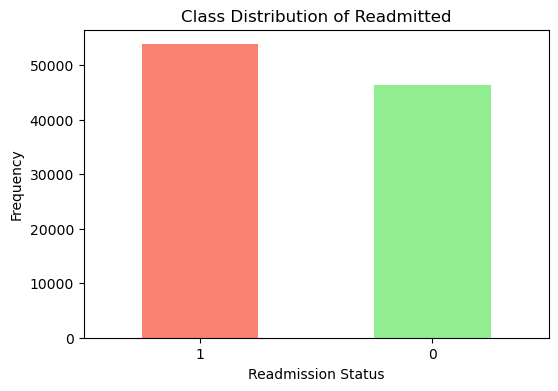

In [33]:
import matplotlib.pyplot as plt

# Assuming 'target_column' is the name of the column containing your target variable
target_column = 'y'

# Plotting the class distribution with different colors
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Class Distribution of Readmitted')
plt.xlabel('Readmission Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()



# Model splitting

In [34]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your features and 'y' contains your target variable
X =data_new[['all_med_count', 'time_in_hospital', 'total_num_procedures', 'diabetes_Meds_count', 'change', 
              'num_comorbidity', 'diabetesMed', 'number_visit', 'age']]  # Assuming 'readmitted' is your target variable
y = data_new['readmitted']

# Splitting the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the resulting datasets
print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Testing set - X:", X_test.shape, "y:", y_test.shape)


Training set - X: (70170, 9) y: (70170,)
Testing set - X: (30074, 9) y: (30074,)


# Random Forest

In [35]:
# Create the model
random_forest_model = RandomForestClassifier()

# Train the model
random_forest_model.fit(X_train, y_train)

# Evaluate the model
prediction = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("Random Forest Accuracy:", accuracy)
print(classification_report(y_test, prediction))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction))


Random Forest Accuracy: 0.563643013899049
              precision    recall  f1-score   support

           0       0.53      0.49      0.51     13981
           1       0.59      0.63      0.61     16093

    accuracy                           0.56     30074
   macro avg       0.56      0.56      0.56     30074
weighted avg       0.56      0.56      0.56     30074


Confusion Matrix:
[[ 6888  7093]
 [ 6030 10063]]


# K-Nearest Neighbors

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Create the model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Evaluate the model
prediction = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("KNN Accuracy:", accuracy)
print(classification_report(y_test, prediction))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction))


KNN Accuracy: 0.560317882556361
              precision    recall  f1-score   support

           0       0.53      0.49      0.51     13981
           1       0.58      0.62      0.60     16093

    accuracy                           0.56     30074
   macro avg       0.56      0.56      0.56     30074
weighted avg       0.56      0.56      0.56     30074


Confusion Matrix:
[[6873 7108]
 [6115 9978]]


# XGBoost

In [37]:
# Create the model
xgb_model = XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Evaluate the model
prediction = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("XGBoost Accuracy:", accuracy)
print(classification_report(y_test, prediction))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction))

XGBoost Accuracy: 0.6134534814125158
              precision    recall  f1-score   support

           0       0.60      0.51      0.55     13981
           1       0.62      0.71      0.66     16093

    accuracy                           0.61     30074
   macro avg       0.61      0.61      0.61     30074
weighted avg       0.61      0.61      0.61     30074


Confusion Matrix:
[[ 7099  6882]
 [ 4743 11350]]


# CatBoost

In [38]:
# Create the model
catboost_model = CatBoostClassifier(verbose=0)

# Train the model
catboost_model.fit(X_train, y_train)

# Evaluate the model
prediction = catboost_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("CatBoost Accuracy:", accuracy)
print(classification_report(y_test, prediction))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction))

CatBoost Accuracy: 0.6167786127552038
              precision    recall  f1-score   support

           0       0.60      0.51      0.55     13981
           1       0.63      0.71      0.66     16093

    accuracy                           0.62     30074
   macro avg       0.61      0.61      0.61     30074
weighted avg       0.62      0.62      0.61     30074


Confusion Matrix:
[[ 7182  6799]
 [ 4726 11367]]


# Applying SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

# Assuming 'X' contains your features and 'y' contains your target variable
X1 = data_new[['all_med_count', 'time_in_hospital', 'total_num_procedures', 'diabetes_Meds_count', 'change', 
              'num_comorbidity', 'diabetesMed', 'number_visit', 'age']] # Assuming 'readmitted' is your target variable
y1 = data_new['readmitted'] 

# Apply SMOTE 
smote = SMOTE(random_state=42)
X1, y1 = smote.fit_resample(X1, y1)

# Check the class distribution after resampling
print("Class Distribution after SMOTE:")
print(y1.value_counts())

# Now you can use X1 and y1 for your modeling tasks



Class Distribution after SMOTE:
readmitted
0    53821
1    53821
Name: count, dtype: int64


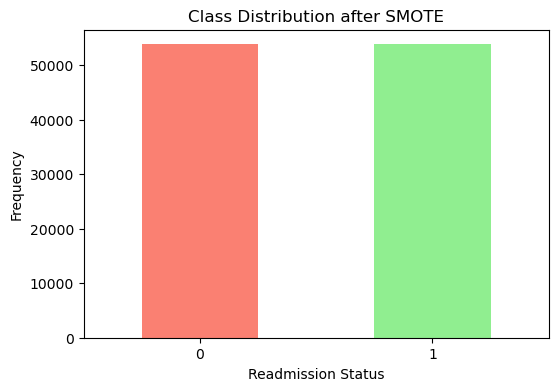

In [40]:
import matplotlib.pyplot as plt

# Plotting the class distribution after SMOTE
plt.figure(figsize=(6, 4))
y1.value_counts().plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Class Distribution after SMOTE')
plt.xlabel('Readmission Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, average_precision_score

# Create the Random Forest model
random_forest_model = RandomForestClassifier() 

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Train the model on the SMOTE-resampled dataset
random_forest_model.fit(X1, y1)

# Evaluate the model on the original test data (not resampled)
prediction = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("Random Forest Accuracy:", accuracy)
print(classification_report(y_test, prediction))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction))



Random Forest Accuracy: 0.7322949245966618
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     16140
           1       0.73      0.75      0.74     16153

    accuracy                           0.73     32293
   macro avg       0.73      0.73      0.73     32293
weighted avg       0.73      0.73      0.73     32293


Confusion Matrix:
[[11580  4560]
 [ 4085 12068]]


# K-Nearest Neighbors

In [42]:
# Create the KNN model
knn_model = KNeighborsClassifier()

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


# Train the model on the SMOTE-resampled dataset
knn_model.fit(X1, y1)

# Evaluate the model on the original test data (not resampled)
prediction = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("KNN Accuracy:", accuracy)
print(classification_report(y_test, prediction))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction))


KNN Accuracy: 0.6687517418635618
              precision    recall  f1-score   support

           0       0.67      0.66      0.67     16140
           1       0.67      0.67      0.67     16153

    accuracy                           0.67     32293
   macro avg       0.67      0.67      0.67     32293
weighted avg       0.67      0.67      0.67     32293


Confusion Matrix:
[[10712  5428]
 [ 5269 10884]]


# XGBoost

In [43]:
# Create the XGBoost model
xgb_model = XGBClassifier()

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


# Train the model on the SMOTE-resampled dataset
xgb_model.fit(X1, y1)

# Evaluate the model on the original test data (not resampled)
prediction = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("XGBoost Accuracy:", accuracy)
print(classification_report(y_test, prediction))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, prediction)) 

XGBoost Accuracy: 0.6359892236707646
              precision    recall  f1-score   support

           0       0.65      0.60      0.62     16140
           1       0.63      0.67      0.65     16153

    accuracy                           0.64     32293
   macro avg       0.64      0.64      0.64     32293
weighted avg       0.64      0.64      0.64     32293


Confusion Matrix:
[[ 9721  6419]
 [ 5336 10817]]


# CatBoost

In [44]:
# Create the CatBoost model
catboost_model = CatBoostClassifier(verbose=0)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


# Train the model on the SMOTE-resampled dataset
catboost_model.fit(X1, y1)

# Evaluate the model on the original test data (not resampled)
prediction = catboost_model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print("CatBoost Accuracy:", accuracy)
print(classification_report(y_test, prediction))

# Confusion Matrix
print("\nConfusion Matrix:")


CatBoost Accuracy: 0.6397980986591522
              precision    recall  f1-score   support

           0       0.65      0.60      0.62     16140
           1       0.63      0.68      0.65     16153

    accuracy                           0.64     32293
   macro avg       0.64      0.64      0.64     32293
weighted avg       0.64      0.64      0.64     32293


Confusion Matrix:


# Applying Downsampling

In [45]:
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'X2' contains your features and 'y2' contains your target variable
# Replace 'X2' and 'y2' with your actual feature and target variable
X2 = data_new[['all_med_count', 'time_in_hospital', 'total_num_procedures', 'diabetes_Meds_count', 'change', 
              'num_comorbidity', 'diabetesMed', 'number_visit', 'age']] # Assuming 'readmitted' is your target variable
y2 = data_new['readmitted'] 

# Calculate the class counts
class_counts = y2.value_counts()

# Determine the minority and majority classes
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()

# Calculate the desired minority class count
desired_minority_class_count = class_counts[majority_class]

# Ensure desired minority class count is less than or equal to the original number of samples in the majority class
if desired_minority_class_count > class_counts[minority_class]:
    desired_minority_class_count = class_counts[minority_class]

# Define the RandomUnderSampler with the desired minority class count
undersampler = RandomUnderSampler(sampling_strategy={majority_class: desired_minority_class_count}, random_state=42)

# Perform undersampling
X2, y2 = undersampler.fit_resample(X2, y2)

# Check the class distribution after resampling
print("Class Distribution after Undersampling:")
print(y2.value_counts())


Class Distribution after Undersampling:
readmitted
0    46423
1    46423
Name: count, dtype: int64


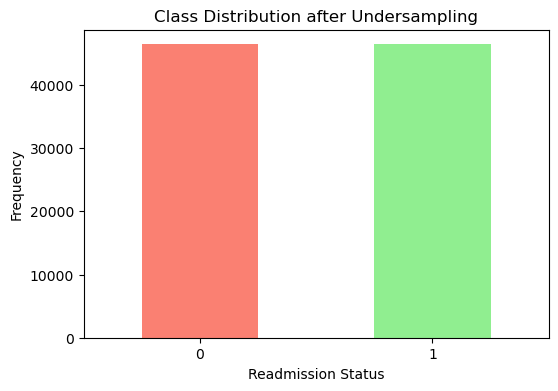

In [46]:
import matplotlib.pyplot as plt

# Plotting the class distribution after undersampling
plt.figure(figsize=(6, 4))
y2.value_counts().plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Class Distribution after Undersampling')
plt.xlabel('Readmission Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


# Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, average_precision_score

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier()

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)


# Train the model on the downsampled training data
random_forest_model.fit(X2, y2)

# Make predictions on the downsampled test data
y_pred = random_forest_model.predict(X_test)
y_pred_proba = random_forest_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.7259998563940547
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72     13899
           1       0.72      0.74      0.73     13955

    accuracy                           0.73     27854
   macro avg       0.73      0.73      0.73     27854
weighted avg       0.73      0.73      0.73     27854



# K-Nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, average_precision_score

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Train the classifier on the downsampled training data
knn_classifier.fit(X2, y2)

# Make predictions on the downsampled test data
y_pred = knn_classifier.predict(X_test)
y_pred_proba = knn_classifier.predict_proba(X_test)[:, 1]  # Probabilities of positive class

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


KNN Accuracy: 0.603252674660731
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.92      0.70     13899
           1       0.78      0.29      0.42     13955

    accuracy                           0.60     27854
   macro avg       0.67      0.60      0.56     27854
weighted avg       0.67      0.60      0.56     27854



# XGBoost

In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, average_precision_score

# Initialize the XGBoost model
xgb_model = XGBClassifier()

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Train the model on the downsampled training data
xgb_model.fit(X2, y2)

# Make predictions on the downsampled test data
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
y_pred = (y_pred_proba >= 0.5).astype(int)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


XGBoost Accuracy: 0.6335176276297839
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.60      0.62     13899
           1       0.63      0.66      0.64     13955

    accuracy                           0.63     27854
   macro avg       0.63      0.63      0.63     27854
weighted avg       0.63      0.63      0.63     27854



# CatBoost

In [50]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, average_precision_score

# Initialize the CatBoost model
catboost_model = CatBoostClassifier()

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Train the model on the downsampled training data
catboost_model.fit(X2, y2)

# Make predictions on the downsampled test data
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
y_pred = (y_pred_proba >= 0.5).astype(int)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Learning rate set to 0.071313
0:	learn: 0.6885582	total: 19.6ms	remaining: 19.6s
1:	learn: 0.6851982	total: 32.8ms	remaining: 16.4s
2:	learn: 0.6821336	total: 47.1ms	remaining: 15.7s
3:	learn: 0.6792007	total: 65.8ms	remaining: 16.4s
4:	learn: 0.6764790	total: 83.5ms	remaining: 16.6s
5:	learn: 0.6743663	total: 107ms	remaining: 17.7s
6:	learn: 0.6723263	total: 130ms	remaining: 18.4s
7:	learn: 0.6705622	total: 150ms	remaining: 18.6s
8:	learn: 0.6691122	total: 172ms	remaining: 18.9s
9:	learn: 0.6678122	total: 194ms	remaining: 19.2s
10:	learn: 0.6667075	total: 216ms	remaining: 19.4s
11:	learn: 0.6657371	total: 237ms	remaining: 19.5s
12:	learn: 0.6647850	total: 260ms	remaining: 19.7s
13:	learn: 0.6640243	total: 282ms	remaining: 19.9s
14:	learn: 0.6633431	total: 309ms	remaining: 20.3s
15:	learn: 0.6627410	total: 331ms	remaining: 20.4s
16:	learn: 0.6622044	total: 351ms	remaining: 20.3s
17:	learn: 0.6618114	total: 367ms	remaining: 20s
18:	learn: 0.6613460	total: 389ms	remaining: 20.1s
19:	lear

164:	learn: 0.6533319	total: 5.26s	remaining: 26.6s
165:	learn: 0.6533115	total: 5.28s	remaining: 26.5s
166:	learn: 0.6532941	total: 5.31s	remaining: 26.5s
167:	learn: 0.6532641	total: 5.33s	remaining: 26.4s
168:	learn: 0.6532389	total: 5.35s	remaining: 26.3s
169:	learn: 0.6532262	total: 5.38s	remaining: 26.2s
170:	learn: 0.6532013	total: 5.4s	remaining: 26.2s
171:	learn: 0.6531750	total: 5.42s	remaining: 26.1s
172:	learn: 0.6531431	total: 5.45s	remaining: 26s
173:	learn: 0.6531148	total: 5.47s	remaining: 26s
174:	learn: 0.6530824	total: 5.49s	remaining: 25.9s
175:	learn: 0.6530599	total: 5.52s	remaining: 25.8s
176:	learn: 0.6530254	total: 5.54s	remaining: 25.8s
177:	learn: 0.6529976	total: 5.57s	remaining: 25.7s
178:	learn: 0.6529818	total: 5.59s	remaining: 25.6s
179:	learn: 0.6529495	total: 5.61s	remaining: 25.6s
180:	learn: 0.6529227	total: 5.63s	remaining: 25.5s
181:	learn: 0.6529029	total: 5.66s	remaining: 25.4s
182:	learn: 0.6528804	total: 5.68s	remaining: 25.4s
183:	learn: 0.652

324:	learn: 0.6496446	total: 9.01s	remaining: 18.7s
325:	learn: 0.6496246	total: 9.03s	remaining: 18.7s
326:	learn: 0.6496027	total: 9.05s	remaining: 18.6s
327:	learn: 0.6495685	total: 9.08s	remaining: 18.6s
328:	learn: 0.6495527	total: 9.1s	remaining: 18.6s
329:	learn: 0.6495285	total: 9.12s	remaining: 18.5s
330:	learn: 0.6495158	total: 9.14s	remaining: 18.5s
331:	learn: 0.6494891	total: 9.16s	remaining: 18.4s
332:	learn: 0.6494736	total: 9.19s	remaining: 18.4s
333:	learn: 0.6494488	total: 9.21s	remaining: 18.4s
334:	learn: 0.6494240	total: 9.23s	remaining: 18.3s
335:	learn: 0.6494044	total: 9.26s	remaining: 18.3s
336:	learn: 0.6493866	total: 9.28s	remaining: 18.3s
337:	learn: 0.6493647	total: 9.31s	remaining: 18.2s
338:	learn: 0.6493472	total: 9.33s	remaining: 18.2s
339:	learn: 0.6493220	total: 9.35s	remaining: 18.2s
340:	learn: 0.6492951	total: 9.38s	remaining: 18.1s
341:	learn: 0.6492866	total: 9.4s	remaining: 18.1s
342:	learn: 0.6492565	total: 9.42s	remaining: 18.1s
343:	learn: 0.

486:	learn: 0.6467727	total: 12.8s	remaining: 13.5s
487:	learn: 0.6467468	total: 12.8s	remaining: 13.4s
488:	learn: 0.6467247	total: 12.8s	remaining: 13.4s
489:	learn: 0.6467086	total: 12.8s	remaining: 13.4s
490:	learn: 0.6466943	total: 12.9s	remaining: 13.3s
491:	learn: 0.6466803	total: 12.9s	remaining: 13.3s
492:	learn: 0.6466688	total: 12.9s	remaining: 13.3s
493:	learn: 0.6466598	total: 12.9s	remaining: 13.2s
494:	learn: 0.6466413	total: 12.9s	remaining: 13.2s
495:	learn: 0.6466188	total: 13s	remaining: 13.2s
496:	learn: 0.6466041	total: 13s	remaining: 13.1s
497:	learn: 0.6465942	total: 13s	remaining: 13.1s
498:	learn: 0.6465829	total: 13s	remaining: 13.1s
499:	learn: 0.6465684	total: 13.1s	remaining: 13.1s
500:	learn: 0.6465487	total: 13.1s	remaining: 13s
501:	learn: 0.6465406	total: 13.1s	remaining: 13s
502:	learn: 0.6465286	total: 13.1s	remaining: 13s
503:	learn: 0.6465107	total: 13.1s	remaining: 12.9s
504:	learn: 0.6464943	total: 13.2s	remaining: 12.9s
505:	learn: 0.6464857	tota

645:	learn: 0.6445149	total: 16.4s	remaining: 8.98s
646:	learn: 0.6444959	total: 16.4s	remaining: 8.95s
647:	learn: 0.6444862	total: 16.4s	remaining: 8.93s
648:	learn: 0.6444704	total: 16.5s	remaining: 8.9s
649:	learn: 0.6444529	total: 16.5s	remaining: 8.88s
650:	learn: 0.6444292	total: 16.5s	remaining: 8.85s
651:	learn: 0.6444120	total: 16.5s	remaining: 8.82s
652:	learn: 0.6443990	total: 16.6s	remaining: 8.79s
653:	learn: 0.6443852	total: 16.6s	remaining: 8.77s
654:	learn: 0.6443640	total: 16.6s	remaining: 8.74s
655:	learn: 0.6443557	total: 16.6s	remaining: 8.71s
656:	learn: 0.6443424	total: 16.6s	remaining: 8.69s
657:	learn: 0.6443252	total: 16.7s	remaining: 8.66s
658:	learn: 0.6443129	total: 16.7s	remaining: 8.64s
659:	learn: 0.6442976	total: 16.7s	remaining: 8.61s
660:	learn: 0.6442775	total: 16.7s	remaining: 8.59s
661:	learn: 0.6442700	total: 16.8s	remaining: 8.56s
662:	learn: 0.6442643	total: 16.8s	remaining: 8.53s
663:	learn: 0.6442585	total: 16.8s	remaining: 8.5s
664:	learn: 0.

805:	learn: 0.6424230	total: 20s	remaining: 4.82s
806:	learn: 0.6424196	total: 20s	remaining: 4.79s
807:	learn: 0.6424112	total: 20.1s	remaining: 4.77s
808:	learn: 0.6423950	total: 20.1s	remaining: 4.74s
809:	learn: 0.6423867	total: 20.1s	remaining: 4.72s
810:	learn: 0.6423685	total: 20.1s	remaining: 4.69s
811:	learn: 0.6423556	total: 20.2s	remaining: 4.67s
812:	learn: 0.6423482	total: 20.2s	remaining: 4.64s
813:	learn: 0.6423363	total: 20.2s	remaining: 4.62s
814:	learn: 0.6423311	total: 20.2s	remaining: 4.59s
815:	learn: 0.6423144	total: 20.2s	remaining: 4.57s
816:	learn: 0.6423084	total: 20.3s	remaining: 4.54s
817:	learn: 0.6423020	total: 20.3s	remaining: 4.51s
818:	learn: 0.6422927	total: 20.3s	remaining: 4.49s
819:	learn: 0.6422816	total: 20.3s	remaining: 4.46s
820:	learn: 0.6422697	total: 20.4s	remaining: 4.44s
821:	learn: 0.6422612	total: 20.4s	remaining: 4.41s
822:	learn: 0.6422447	total: 20.4s	remaining: 4.39s
823:	learn: 0.6422327	total: 20.4s	remaining: 4.36s
824:	learn: 0.64

965:	learn: 0.6404501	total: 23.6s	remaining: 831ms
966:	learn: 0.6404414	total: 23.6s	remaining: 807ms
967:	learn: 0.6404203	total: 23.7s	remaining: 782ms
968:	learn: 0.6404053	total: 23.7s	remaining: 758ms
969:	learn: 0.6403913	total: 23.7s	remaining: 733ms
970:	learn: 0.6403789	total: 23.7s	remaining: 709ms
971:	learn: 0.6403637	total: 23.7s	remaining: 684ms
972:	learn: 0.6403523	total: 23.8s	remaining: 660ms
973:	learn: 0.6403427	total: 23.8s	remaining: 635ms
974:	learn: 0.6403277	total: 23.8s	remaining: 611ms
975:	learn: 0.6403224	total: 23.8s	remaining: 586ms
976:	learn: 0.6403187	total: 23.9s	remaining: 562ms
977:	learn: 0.6403162	total: 23.9s	remaining: 537ms
978:	learn: 0.6403029	total: 23.9s	remaining: 513ms
979:	learn: 0.6402887	total: 23.9s	remaining: 488ms
980:	learn: 0.6402694	total: 24s	remaining: 464ms
981:	learn: 0.6402647	total: 24s	remaining: 440ms
982:	learn: 0.6402537	total: 24s	remaining: 415ms
983:	learn: 0.6402420	total: 24s	remaining: 391ms
984:	learn: 0.640229

# Hyperparameter Tuning of the Best Model

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification
import numpy as np

# Example dataset creation (replace this with your actual data)
X1, y1 = make_classification(n_samples=1000, n_features=9, random_state=42)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Define the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': np.arange(5, 20, 1),
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': ['sqrt', 'log2']  # Corrected to valid values
}

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=random_forest_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    random_state=42
)

# Fit the model using the SMOTE-balanced dataset (X1, y1)
random_search.fit(X_train, y_train)

# Best parameters found
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Predict with the best estimator
best_rf_model = random_search.best_estimator_
predictions = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Random Forest Accuracy:", accuracy)
print(classification_report(y_test, predictions))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))



Best parameters found:  {'n_estimators': 130, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 14}
Random Forest Accuracy: 0.9433333333333334
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       156
           1       0.99      0.89      0.94       144

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.94      0.94       300


Confusion Matrix:
[[155   1]
 [ 16 128]]


# Cross Validation Of  the Best Models

# Random Forest

Cross-Validation Scores: [0.85714286 0.91428571 0.87857143 0.88571429 0.9       ]
Mean Cross-Validation Score: 0.8871428571428572
Random Forest Accuracy on Test Set: 0.9366666666666666

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       156
           1       0.99      0.88      0.93       144

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.94       300
weighted avg       0.94      0.94      0.94       300


Confusion Matrix on Test Set:


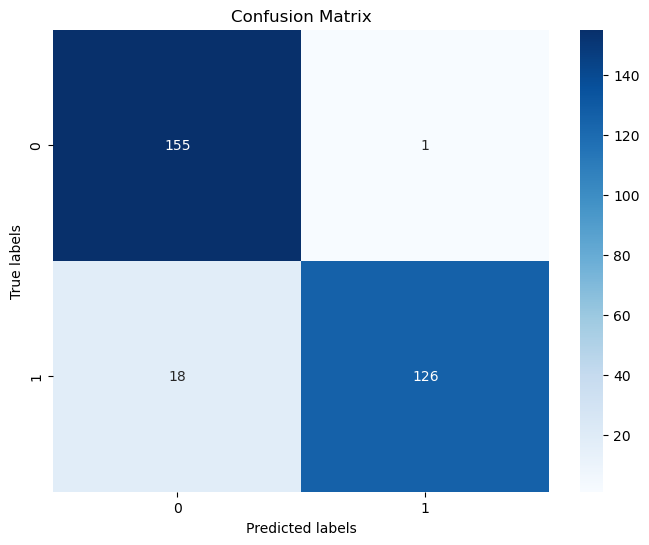

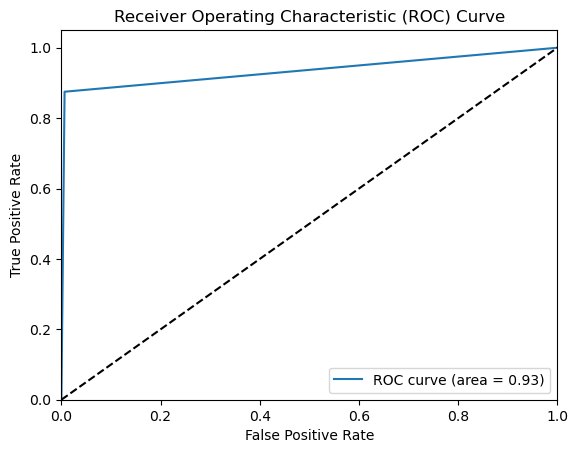

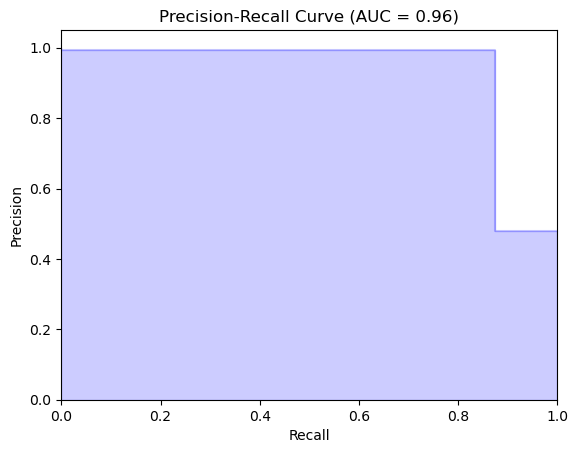


ROC AUC Score on Test Set: 0.9342948717948718

Average Precision Score on Test Set: 0.9281102362204725


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Assuming X and y are your features and target variables
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Create the Random Forest model
random_forest_model = RandomForestClassifier()

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Cross-validation scores
cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# Perform cross-validated predictions
y_pred_cv = cross_val_predict(random_forest_model, X_train, y_train, cv=5)

# Evaluate the model on the test data
y_pred_test = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Random Forest Accuracy on Test Set:", accuracy)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("\nConfusion Matrix on Test Set:")
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve (AUC)
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)
pr_auc = auc(recall, precision)
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AUC = %0.2f)' % pr_auc)
plt.show()

# ROC AUC Score
print("\nROC AUC Score on Test Set:", roc_auc)

# Average Precision Score
avg_precision = average_precision_score(y_test, y_pred_test)
print("\nAverage Precision Score on Test Set:", avg_precision)


In [53]:
# 3. Model Prediction
new_predictions = random_forest_model.predict(X1)

print("Predicted outcomes for X1:")
for prediction in new_predictions:
    if prediction == 1:
        print("readmission risk")
    else:
        print("No readmission risk")



Predicted outcomes for X1:
No readmission risk
readmission risk
readmission risk
No readmission risk
readmission risk
No readmission risk
readmission risk
No readmission risk
No readmission risk
No readmission risk
readmission risk
No readmission risk
No readmission risk
readmission risk
readmission risk
readmission risk
readmission risk
readmission risk
readmission risk
readmission risk
readmission risk
readmission risk
readmission risk
readmission risk
No readmission risk
No readmission risk
readmission risk
No readmission risk
No readmission risk
readmission risk
No readmission risk
readmission risk
readmission risk
readmission risk
readmission risk
No readmission risk
readmission risk
No readmission risk
readmission risk
No readmission risk
readmission risk
readmission risk
No readmission risk
readmission risk
No readmission risk
No readmission risk
No readmission risk
readmission risk
readmission risk
No readmission risk
readmission risk
readmission risk
No readmission risk
readmi

In [54]:
# 3. Model Prediction
new_predictions = random_forest_model.predict(X1)

# Count the occurrences of each class in the predictions
readmitted_count = sum(new_predictions == 1)
not_readmitted_count = sum(new_predictions == 0)

# Calculate the percentage of readmitted and not readmitted
total_samples = len(new_predictions)
percentage_readmitted = (readmitted_count / total_samples) * 100
percentage_not_readmitted = (not_readmitted_count / total_samples) * 100

# Print the percentages
print("Percentage of Readmissions:", percentage_readmitted, "%")
print("Percentage of Non-Readmissions:", percentage_not_readmitted, "%")



Percentage of Readmissions: 48.3 %
Percentage of Non-Readmissions: 51.7 %


  0%|          | 0/10025 [00:00<?, ?it/s]

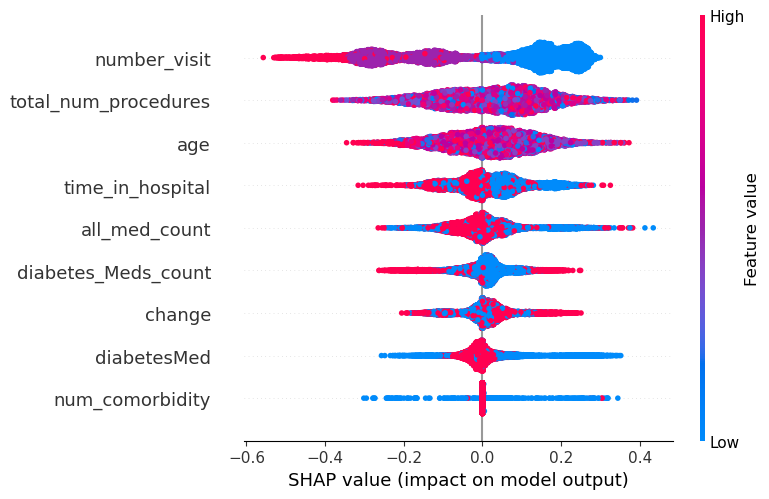

In [55]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assume you have your dataset loaded into a DataFrame called 'data_new'
# and your target variable is 'readmitted'

# Split data into features and target
X1 = data_new[['all_med_count', 'time_in_hospital', 'total_num_procedures', 'diabetes_Meds_count', 'change', 
              'num_comorbidity', 'diabetesMed', 'number_visit', 'age']]  # Assuming 'readmitted' is your target variable
y1 = data_new['readmitted']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, random_state=42)

# Train a model (example: RandomForestClassifier)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Initialize explainer with KernelSHAP
background = shap.sample(X_train, 100)  # Using 100 background samples
explainer = shap.KernelExplainer(model.predict, background)


# Calculate SHAP values
shap_values = explainer.shap_values(X_test, nsamples=100)  # Adjust nsamples as needed

# Summary plot
shap.summary_plot(shap_values, X_test)

# Individual SHAP value plot
# Example for the first instance in the test set
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

